### Setting up environment:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### Loading data:

In [2]:
datacols = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [3]:
df_train=pd.read_table("KDDTrain+.txt",sep=',',names=datacols)
df_test=pd.read_table("KDDTest+.txt",sep=',',names=datacols)

In [4]:
df_train['attack'] = df_train['attack'].replace(['normal'],'Normal')
df_train['attack']=df_train['attack'].replace(['neptune','satan','ipsweep','portsweep','smurf','nmap','back','teardrop','warezclient','pod','guess_passwd','buffer_overflow','warezmaster','land','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl','spy'],'Attack')

### Mapping attacks 

In [5]:
df_test['attack'] = df_test['attack'].replace(['normal'],'Normal')
df_test['attack']=df_test['attack'].replace(['neptune','mscan','apache2','processtable','snmpguess','saint','mailbomb',
                                             'snmpgetattack','httptunnel','named','ps','sendmail','xterm','xlock','xsnoop','sqlattack','worm','udpstorm',
                                             'satan','ipsweep','portsweep','smurf','nmap','back','teardrop','warezclient','pod','guess_passwd','buffer_overflow','warezmaster','land','imap','rootkit','loadmodule','ftp_write','multihop','phf','perl','spy'],'Attack')

In [6]:
df_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Attack,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,Attack,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,Normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,Attack,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,Attack,11


In [7]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,Normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,Normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Attack,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,Normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Normal,21


In [8]:
df_train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


### Distribution of attak and normal classes

In [9]:
attack_class_freq_train = df_train[['attack']].apply(lambda x: x.value_counts())
attack_class_freq_test = df_test[['attack']].apply(lambda x: x.value_counts())
attack_class_freq_train['frequency_percent_train'] = round((100 * attack_class_freq_train / attack_class_freq_train.sum()),2)
attack_class_freq_test['frequency_percent_test'] = round((100 * attack_class_freq_test / attack_class_freq_test.sum()),2)

attack_class_dist = pd.concat([attack_class_freq_train,attack_class_freq_test], axis=1) 
attack_class_dist

,attack,frequency_percent_train,attack,frequency_percent_test
Normal,67343,53.46,9711,43.08
Attack,58630,46.54,12833,56.92


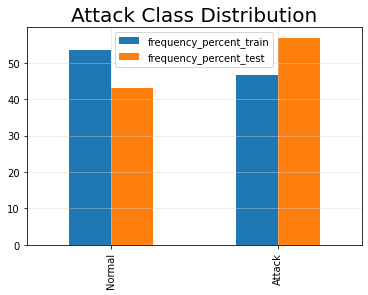

In [10]:
plot = attack_class_dist[['frequency_percent_train', 'frequency_percent_test']].plot(kind="bar");
plot.set_title("Attack Class Distribution", fontsize=20);
plot.grid(color='lightgray', alpha=0.5);

### Data PreProcessing:

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols=df_train.select_dtypes(include=['float64','int64']).columns
sc_train = sc.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = sc.fit_transform(df_test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [12]:
sc_traindf

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,0.216426
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,-1.965556
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,-0.219970
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,0.652823
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.818890,-0.938287,-0.121485,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426
125969,-0.107178,-0.007744,-0.004883,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,1.159389,0.977304,-0.386146,-0.447834,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,0.652823
125970,-0.110249,-0.007382,-0.004823,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,-0.773724,-0.893738,-0.121485,-0.480197,-0.289103,0.979238,-0.624871,-0.355014,-0.376387,-0.656367
125971,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,-0.972455,-1.094207,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0.216426


In [13]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(en.fit_transform)
testcat = cattest.apply(en.fit_transform)

# separate target column from encoded data 
enctrain = traincat.drop(['attack'], axis=1)
enctest = testcat.drop(['attack'], axis=1)

cat_Ytrain = traincat[['attack']].copy()
cat_Ytest = testcat[['attack']].copy()

In [14]:
X_train=pd.concat([sc_traindf,enctrain],axis=1)
X_test=pd.concat([sc_testdf,enctest],axis=1)
X_trainarr= np.concatenate((sc_train, enctrain.values), axis=1)
refcol=pd.concat([sc_traindf,enctrain],axis=1).columns
c, r = cat_Ytrain.values.shape
y = cat_Ytrain.values.reshape(c,)
c, r = cat_Ytest.values.shape
y_test = cat_Ytest.values.reshape(c,)
Y_train=cat_Ytrain
Y_test=cat_Ytest



### Feature Selection:

In [15]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import itertools
rfc = RandomForestClassifier()

# fit random forest classifier on the training set

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10,step=1)
rfe = rfe.fit(X_trainarr, y)
rfe.support_
# summarize the selection of the attributes

array([False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True,  True, False,  True])

In [16]:
refcol

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'last_flag', 'protocol_type', 'service',
       'flag'],
      dtype='object')

selected features are src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_count,last_flag,protocol_type,flag

In [17]:
X_final_train=X_train[['src_bytes','dst_bytes','count','same_srv_rate','diff_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','last_flag','protocol_type','flag']]

In [18]:
X_final_train

,src_bytes,dst_bytes,count,same_srv_rate,diff_srv_rate,dst_host_srv_count,dst_host_same_srv_rate,last_flag,protocol_type,flag
0,-0.007679,-0.004919,-0.717045,0.771283,-0.349683,-0.818890,-0.782367,0.216426,1,9
1,-0.007737,-0.004919,-0.620982,-1.321428,0.482201,-1.035688,-1.161030,-1.965556,2,9
2,-0.007762,-0.004919,0.339648,-1.389669,0.038529,-0.809857,-0.938287,-0.219970,1,5
3,-0.007723,-0.002891,-0.690846,0.771283,-0.349683,1.258754,1.066401,0.652823,1,9
4,-0.007728,-0.004814,-0.472521,0.771283,-0.349683,1.258754,1.066401,0.652823,1,9
...,...,...,...,...,...,...,...,...,...,...
125968,-0.007762,-0.004919,0.872361,-1.184947,-0.016930,-0.818890,-0.938287,0.216426,1,5
125969,-0.007744,-0.004883,-0.717045,0.771283,-0.349683,1.159389,0.977304,0.652823,2,9
125970,-0.007382,-0.004823,-0.725778,0.771283,-0.349683,-0.773724,-0.893738,-0.656367,1,9
125971,-0.007762,-0.004919,0.523041,-1.366922,-0.072389,-0.972455,-1.094207,0.216426,1,5


In [19]:
X_final_test=X_test[['src_bytes','dst_bytes','count','same_srv_rate','diff_srv_rate','dst_host_srv_count','dst_host_same_srv_rate','last_flag','protocol_type','flag']]

In [20]:
X_final_test.shape

(22544, 10)

In [21]:
y_train=traincat['attack']
y_test=testcat['attack']

### Training models

In [24]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
# Train ADABOOST CLASSIFIER
ADA_Classifier=AdaBoostClassifier()
ADA_Classifier.fit(X_final_train,y_train)
# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_final_train, y_train)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(C=0.01,random_state=42)
LGR_Classifier.fit(X_final_train, y_train)

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_final_train, y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=42,max_depth=10)
DTC_Classifier.fit(X_final_train, y_train)
            
# Train SVM classifier
SVC_Classifier = SVC(C=1,gamma='scale',kernel='rbf')
SVC_Classifier.fit(X_final_train, y_train)
# Train MLP Classifier
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=200, alpha=0.0001,
                     solver='sgd', verbose=10, random_state=21)
MLP_Classifier.fit(X_final_train, y_train)

Iteration 1, loss = 0.22017985
Iteration 2, loss = 0.12077266
Iteration 3, loss = 0.10595004
Iteration 4, loss = 0.09381350
Iteration 5, loss = 0.08231161
Iteration 6, loss = 0.07272505
Iteration 7, loss = 0.06514838
Iteration 8, loss = 0.06010831
Iteration 9, loss = 0.05606247
Iteration 10, loss = 0.05329611
Iteration 11, loss = 0.05134068
Iteration 12, loss = 0.04954901
Iteration 13, loss = 0.04795605
Iteration 14, loss = 0.04672416
Iteration 15, loss = 0.04572834
Iteration 16, loss = 0.04488793
Iteration 17, loss = 0.04408527
Iteration 18, loss = 0.04328330
Iteration 19, loss = 0.04271040
Iteration 20, loss = 0.04208268
Iteration 21, loss = 0.04170640
Iteration 22, loss = 0.04116751
Iteration 23, loss = 0.04086914
Iteration 24, loss = 0.04035221
Iteration 25, loss = 0.04001089
Iteration 26, loss = 0.03962644
Iteration 27, loss = 0.03927252
Iteration 28, loss = 0.03893335
Iteration 29, loss = 0.03862043
Iteration 30, loss = 0.03831458
Iteration 31, loss = 0.03797071
Iteration 32, los

C:\Users\harik\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), random_state=21, solver='sgd',
              verbose=10)

### Evaluation of train models:

In [25]:
from sklearn import metrics

models = []
models.append(('SVM Classifier', SVC_Classifier))
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('AdaboostClassifier', ADA_Classifier))
models.append(("MLPClassifier",MLP_Classifier))

for i, v in models:
    accuracy = metrics.accuracy_score(y_train, v.predict(X_final_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_final_train))
    classification = metrics.classification_report(y_train, v.predict(X_final_train))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


Model Accuracy:
 0.9880053662292714

Confusion matrix:
 [[58221   409]
 [ 1102 66241]]

Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99     58630
           1       0.99      0.98      0.99     67343

    accuracy                           0.99    125973
   macro avg       0.99      0.99      0.99    125973
weighted avg       0.99      0.99      0.99    125973



Model Accuracy:
 0.8912465369563319

Confusion matrix:
 [[50365  8265]
 [ 5435 61908]]

Classification report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88     58630
           1       0.88      0.92      0.90     67343

    accuracy                           0.89    125973
   macro avg       0.89      0.89      0.89    125973
weighted avg       0.89      0.89      0.89    125973



Model Accuracy:
 0.9988807125336382

Confusion matrix:
 [[58554    76]
 [   65 67278]]

Classification report:
      

### Evaluation of test models

In [26]:
for i, v in models:
    accuracy = metrics.accuracy_score(y_test, v.predict(X_final_test))
    confusion_matrix = metrics.confusion_matrix(y_test, v.predict(X_final_test))
    classification = metrics.classification_report(y_test, v.predict(X_final_test))
    print()
    print('============================== {} Model Test Results =============================='.format(v))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()



============================== SVC(C=1) Model Test Results ==============================

Model Accuracy:
 0.805624556422995

Confusion matrix:
 [[8765 4068]
 [ 314 9397]]

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80     12833
           1       0.70      0.97      0.81      9711

    accuracy                           0.81     22544
   macro avg       0.83      0.83      0.81     22544
weighted avg       0.85      0.81      0.80     22544



============================== BernoulliNB() Model Test Results ==============================

Model Accuracy:
 0.7834013484740951

Confusion matrix:
 [[8446 4387]
 [ 496 9215]]

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.66      0.78     12833
           1       0.68      0.95      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.81      0.80      0.78     22